In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 17
# from jupyterthemes import jtplot
# jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

<h1>Introduction</h1>

Cardiovascular disease is the leading cause of death globally, and it is expected to cause more than 23.6 million fatalities a year by 2030 [1]. One’s survival from cardiovascular disease primarily depends on early detection and accurate diagnosis of the disease [4].

We can utilize Machine Learning algorithms to predict how likely one is to be diagnosed with cardiovascular disease, which can be used to improve the prevention rate and to provide critical insight for physicians to provide the correct treatment for the patient. In this project, we compare and contrast several ML algorithms for prediction of cardiovascular disease, and analyze them to identify the factors that determine which algorithm is the best fit for our given dataset.

***

<h1>Methods</h1>

Heart Disease UCI has made their data available with information from 303 individuals. The dataset provides basic features such as age and sex as well as features that are crucial to diagnosing cardiovascular disease such as blood pressure, cholesterol levels, and blood sugar levels.

The data contains the following columns:

- Age - age in years
- Sex - (1=male; 0=female)
- Cp - chest pain type
- Trestbps - resting blood pressure (in mm Hg on admission to the hospital)
- Chol - serum cholesterol in mg/dl
- Fbs - (fasting blood sugar > 120 mg/dl) (1=true; 0=false)
- Restecg - resting electrocardiographic results
- Thalach - maximum heart rate achieved
- Exang - exercise induced angina (1=yes; 0=no)
- Oldpeak - ST depression induced by exercise relative to rest
- Slope - the slope of the peak exercise ST segment
- Ca - number of major vessels (0-3) colored by flourosopy
- Thal - 3 = normal; 6 = fixed defect; 7 = reversible defect
- Target - have disease or not (1=yes, 0=no)

<b>The goal is to classify the binary class ‘target’, which indicates whether or not a patient has cardiovascular disease using unsupervised learning.<br>
A value of 0 indicates a patient with cardiovascular disease while a value of 1 indicates a patient without cardiovascular disease.</b>

<h1>Exploratory Data Analysis</h1>

In [2]:
data = pd.read_csv('data.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
data.shape

(303, 14)

In [6]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
data = data.drop_duplicates()
data.shape

(302, 14)

In [8]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [9]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
for column in data.columns:
    print(column, data[column].unique())

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trestbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
reste

In [11]:
# wrong data ???
data[data['ca'] == 4]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2,1
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3,1
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
251,43,1,0,132,247,1,0,143,1,0.1,1,4,3,0


In [12]:
# wrong data ???
data[data['thal'] == 0]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
48,53,0,2,128,216,0,0,115,0,0.0,2,0,0,1
281,52,1,0,128,204,1,1,156,1,1.0,1,0,0,0


<h1>Kernal density estimation (KDE)</h1>

KDE is used for visualizing the probability density at different values in a continuous variable.

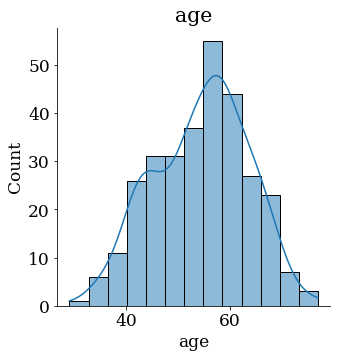

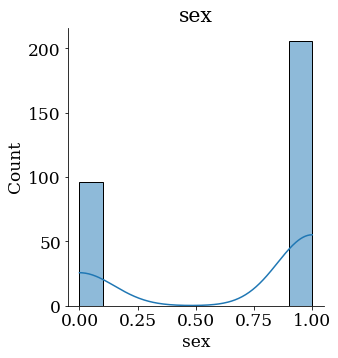

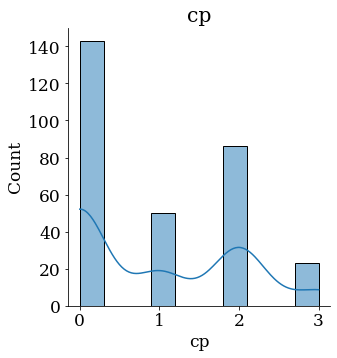

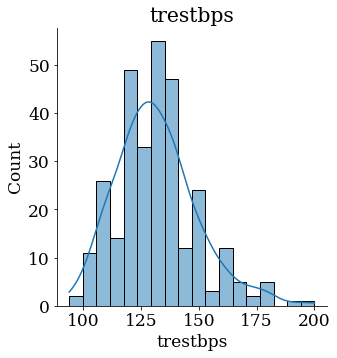

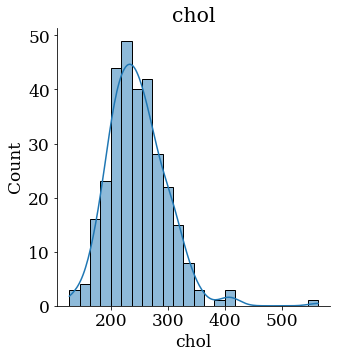

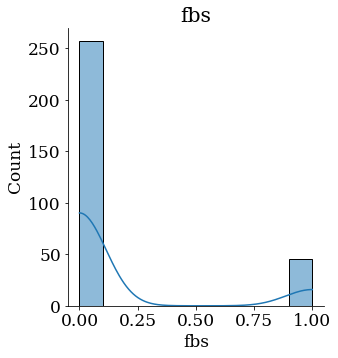

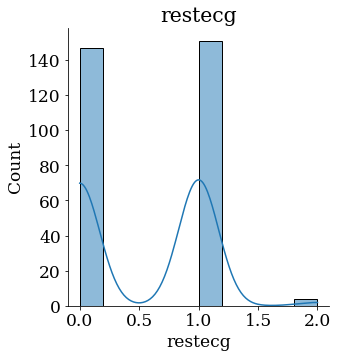

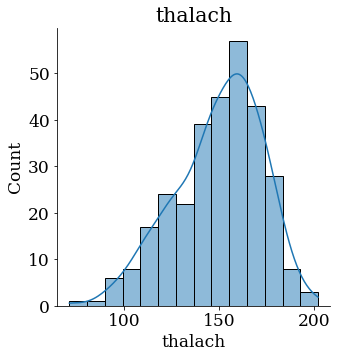

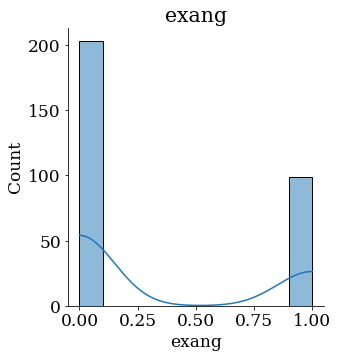

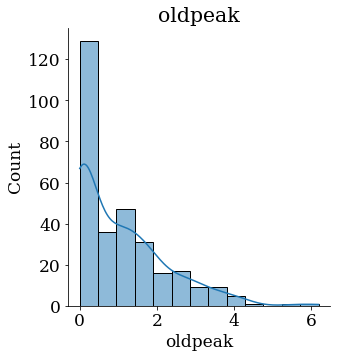

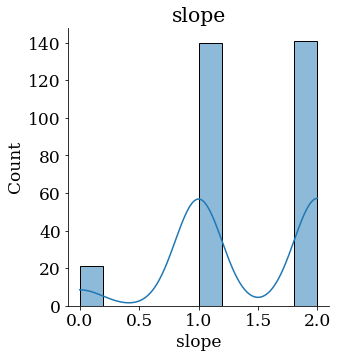

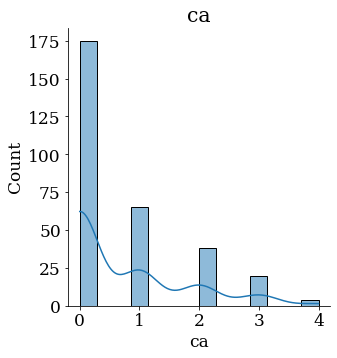

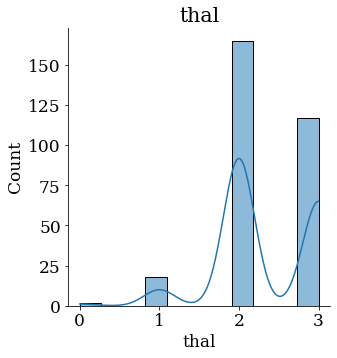

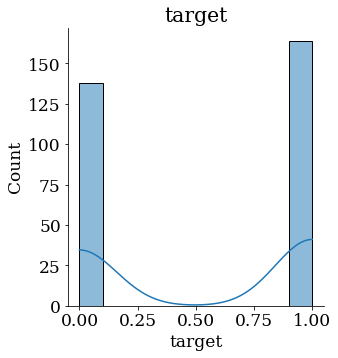

In [13]:
for column in data.columns:
    sns.displot(data=data, x=column, kde=True)
    plt.title(column)

<h1>Correlation heatmap of dataset variables</h1>

Based on the correlation heatmap below, the bottom-most row and right-most column depict the correlation of each factor with the target. From the correlation heat map, it is evident that cp, thalach are the most positively correlated with the target, and exang, oldpeak, and ca are the most inversely correlated with the target. To summarize, from the correlation heat map, the five features (cp, thalach, exang, oldpeak, ca) depict the most correlation with the target result.

<AxesSubplot:>

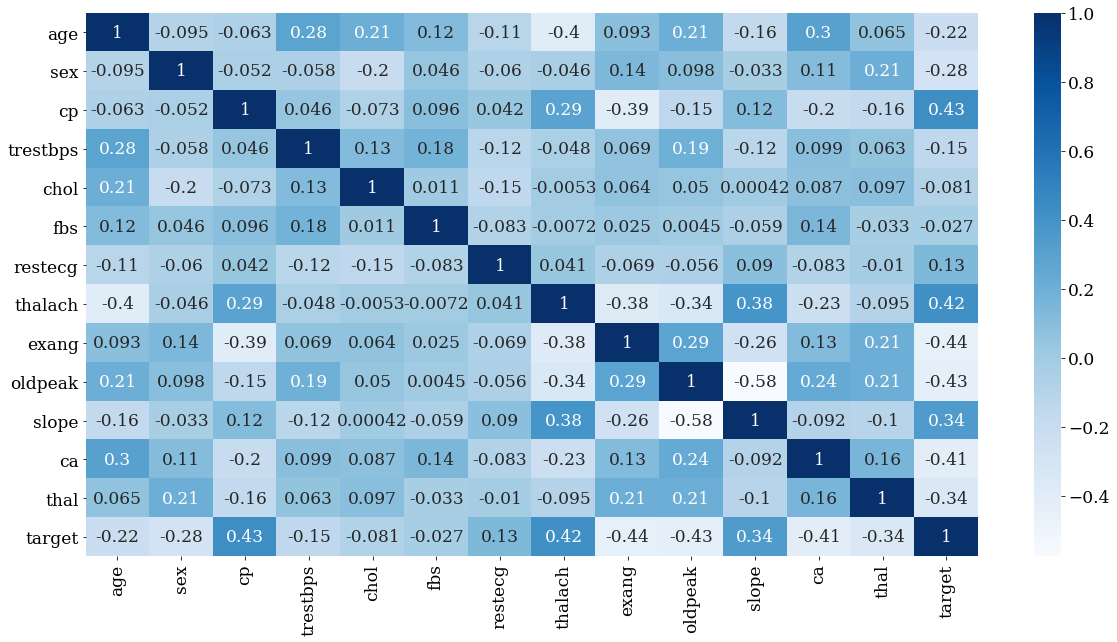

In [14]:
corr = data.corr()
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, cmap='Blues')

<h1>Unsupervised Learning - 1</h1>

***

<h1>K-means</h1>

K-means is an unsupervised learning algorithm for clustering. This algorithm works by grouping some data points togeter in an unsupervised fastion. It groups observations with similar attribute values together by measuring the Euclidean distance between points.

<h1>K-means algorithm steps</h1>

1. Choose number of clusters, K.
2. Select random K points that are going to be the centroids for each cluster.
3. Assign each data point to the nearest centroid, doing so will enable us to create K number of clusters. 
4. Calculate a new centroid for each cluster.
5. Reassign each data point to the new closes centroid
6. Go to step 4 and repeat.

<h1>Elbow method can be used to find out the best "k" for k-means algorithm</h1>

The elbow method is a heuristic method of interpretation and validation of consistency within cluster analysis designed to help find the appropriate number of clusters in a dataset. If the line chart looks like an arm, then the "elbow" on the arm is the value of k that is the best.

<em>We already know that we need 2 clusters for this dataset since the target value is binary (1=Heart disease; 0=No heart disease), however, we are still going to try the elbow method to see whether or not the elbow method correctly suggests 2 for the best "k".</em>

In [15]:
x = data.drop('target', axis=1)
print(x.shape)
y = data['target'].to_numpy().astype('uint8')

# onehot encoding
onehot_x = pd.get_dummies(x, columns=['sex', 'cp', 'exang', 'slope', 'ca', 'thal'])
onehot_x

scaler = StandardScaler()
scaled_x = scaler.fit_transform(onehot_x)
onehot_x

(302, 13)


,age,trestbps,chol,fbs,restecg,thalach,oldpeak,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,63,145,233,1,0,150,2.3,0,1,0,...,0,1,0,0,0,0,0,1,0,0
1,37,130,250,0,1,187,3.5,0,1,0,...,0,1,0,0,0,0,0,0,1,0
2,41,130,204,0,0,172,1.4,1,0,0,...,1,1,0,0,0,0,0,0,1,0
3,56,120,236,0,1,178,0.8,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,57,120,354,0,1,163,0.6,1,0,1,...,1,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,140,241,0,1,123,0.2,1,0,1,...,0,1,0,0,0,0,0,0,0,1
299,45,110,264,0,1,132,1.2,0,1,0,...,0,1,0,0,0,0,0,0,0,1
300,68,144,193,1,1,141,3.4,0,1,1,...,0,0,0,1,0,0,0,0,0,1
301,57,130,131,0,1,115,1.2,0,1,1,...,0,0,1,0,0,0,0,0,0,1


<h1>K-means intertia</h1>

K-means Intertia is calculated as the sum of squared distance for each point to its closest centroid. Intuitively, inertia tells us how far away the points within a cluster are. Therefore, a small value of inertia is aimed for. The range of inertia’s value starts from zero and goes up.

<h1>Elbow method shows that the best "k" is 2!</h1>

As you can see the graph below, using the elbow method, the best "k" for k-means clustering algorithm is 2. Since we already know that we need two clusters (1=Heart disease; 0=No heart disease), we can confirm that k-means algorithm and the elbow method is showing a convincing result.

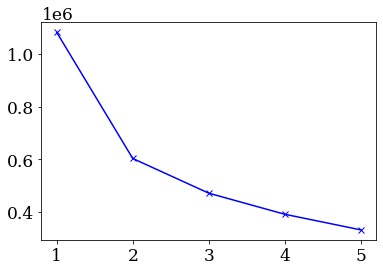

In [16]:
scores_x = []
scores_y = []
k = 5
for i in range(1, k + 1):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(onehot_x)
    scores_x.append(i)
    scores_y.append(kmeans.inertia_)

plt.plot(scores_x, scores_y, 'bx-')

<h1>K-means result using k = 2</h1>

Accuracy is <b>83.4437%</b> 

In [40]:
kmeans = KMeans(2)
kmeans.fit(scaled_x)
y_hat = kmeans.predict(scaled_x)
accuracy = max((y_hat == y).mean(), (y_hat == np.logical_not(y)).mean())
accuracy

0.8344370860927153

In [41]:
kmeans.cluster_centers_.shape

(2, 27)

In [42]:
cluster_centers = pd.DataFrame(data=kmeans.cluster_centers_, columns=onehot_x.columns)
cluster_centers

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,-0.289255,-0.138927,-0.021836,-0.076417,0.096034,0.490927,-0.471651,0.308508,-0.308508,-0.524680,...,0.528925,0.397393,-0.164960,-0.224769,-0.214757,-0.003713,-0.002617,-0.197602,0.640814,-0.558405
1,0.309067,0.148442,0.023331,0.081651,-0.102612,-0.524552,0.503956,-0.329639,0.329639,0.560617,...,-0.565152,-0.424612,0.176259,0.240164,0.229466,0.003968,0.002796,0.211136,-0.684706,0.596652


In [43]:
cluster_centers = scaler.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data = cluster_centers, columns = onehot_x.columns)
cluster_centers

,age,trestbps,chol,fbs,restecg,thalach,oldpeak,sex_0,sex_1,cp_0,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,51.807692,129.166667,245.371795,0.121795,0.576923,160.794872,0.496154,0.461538,0.538462,0.211538,...,0.730769,0.775641,0.147436,0.051282,0.012821,0.012821,0.006410,0.012821,0.865385,0.115385
1,57.212329,134.205479,247.705479,0.178082,0.472603,137.575342,1.627397,0.164384,0.835616,0.753425,...,0.184932,0.369863,0.287671,0.205479,0.123288,0.013699,0.006849,0.109589,0.205479,0.678082


<h1>Unsupervised Learning - 2</h1>

***

<h1>Principal component analysis (PCA)</h1>

PCA is an unsupervised machine learning alorithm. It perfomrs dimensionality reductions while attemping at keeping the original information unchaged. PCA works by trying to find a new set of features called components. Components are composites of the uncorrelated given input features.

In [24]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_x)

In [25]:
pca_data = pd.DataFrame(principal_components, columns =['pca_1','pca_2'])
pca_data.head()

,pca_1,pca_2
0,0.765098,-0.959121
1,-1.563193,-1.051080
2,-3.272545,0.576797
3,-2.741124,-1.475319
4,-0.734209,1.956698


In [26]:
pca_kmeans_data = pd.concat([pca_data, pd.DataFrame({'cluster': y_hat})], axis=1)
pca_kmeans_data.head()

,pca_1,pca_2,cluster
0,0.765098,-0.959121,1
1,-1.563193,-1.051080,0
2,-3.272545,0.576797,0
3,-2.741124,-1.475319,0
4,-0.734209,1.956698,0


In [27]:
pca_ground_truth_data = pd.concat([pca_data, pd.DataFrame({'target': y})], axis=1)
pca_ground_truth_data.head()

,pca_1,pca_2,target
0,0.765098,-0.959121,1
1,-1.563193,-1.051080,1
2,-3.272545,0.576797,1
3,-2.741124,-1.475319,1
4,-0.734209,1.956698,1


<h1>Plotting the k-means result using PCA components</h1>

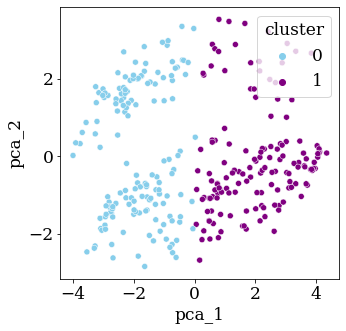

In [28]:
plt.figure(figsize=(5, 5))
ax = sns.scatterplot(x='pca_1', y='pca_2', hue ='cluster',
                     data=pca_kmeans_data, palette =['skyblue','purple'])
plt.show()

<h1>Plotting the ground truth using PCA components</h1>

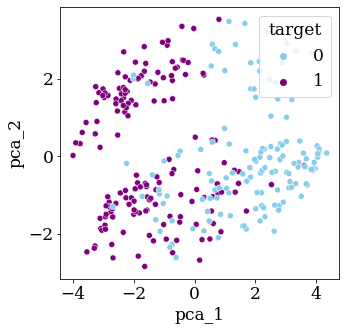

In [29]:
plt.figure(figsize=(5, 5))
ax = sns.scatterplot(x='pca_1', y='pca_2', hue ='target',
                     data=pca_ground_truth_data, palette =['skyblue','purple'])
plt.show()

<h1>Unsupervised Learning - 3</h1>

***

<h1>K nearest neighbor (KNN)</h1>

The k nearest neighbor classifier has many desirable features – it requires no training, it can learn arbitrarily complex decision boundaries, and it trivially supports multi-class problems. The voting aspect also alleviates training noise. K-nearest neighbor classifiers also suffers from the curse of dimensionality, because the classifier has no mechanism to learn which dimensions are not relevant for the decision. The k neighbor computation also becomes slow for many training examples.